**Q 1 - By Marella Ramana Reddy<br>** <br>
A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.<br>
Please assist the consultant in the area of statistical analysis by doing this;<br>
- A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric).
Correlation and ANOVA, if applicable, is a must.<br>
- A graphical analysis of the additives, including a distribution study.<br>
- A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [43]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [44]:
Q1_data= pd.read_csv('ingredient.csv')

In [45]:
Q1_data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [46]:
Q1_data.dtypes


a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [47]:
Q1_data.shape

(214, 9)

In [48]:
Q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [49]:
#check if there are any missing or null values. Luckily there is none!
Q1_data.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

<span style=color:blue>**Summary**<br>
- Data contains 214 rows and 9 coloumns <br>
- All features contain numerical values or continuous data type<br>
- There is no missing values in data


In [50]:
Q1_data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [51]:
Q1_data.var()

a    0.000009
b    0.666841
c    2.080540
d    0.249270
e    0.599921
f    0.425354
g    2.025366
h    0.247227
i    0.009494
dtype: float64

<span style=color:blue>**Summary**<br>
- From Q1_data.discribe()-25% is Q1 50% is Q2 **which is  nothing but median**  and 75% is Q3
- Mean and Median looks almonst close to each other
- Data dispersion took unifirm around the mean excpet for columnn c and g

<AxesSubplot:ylabel='i'>

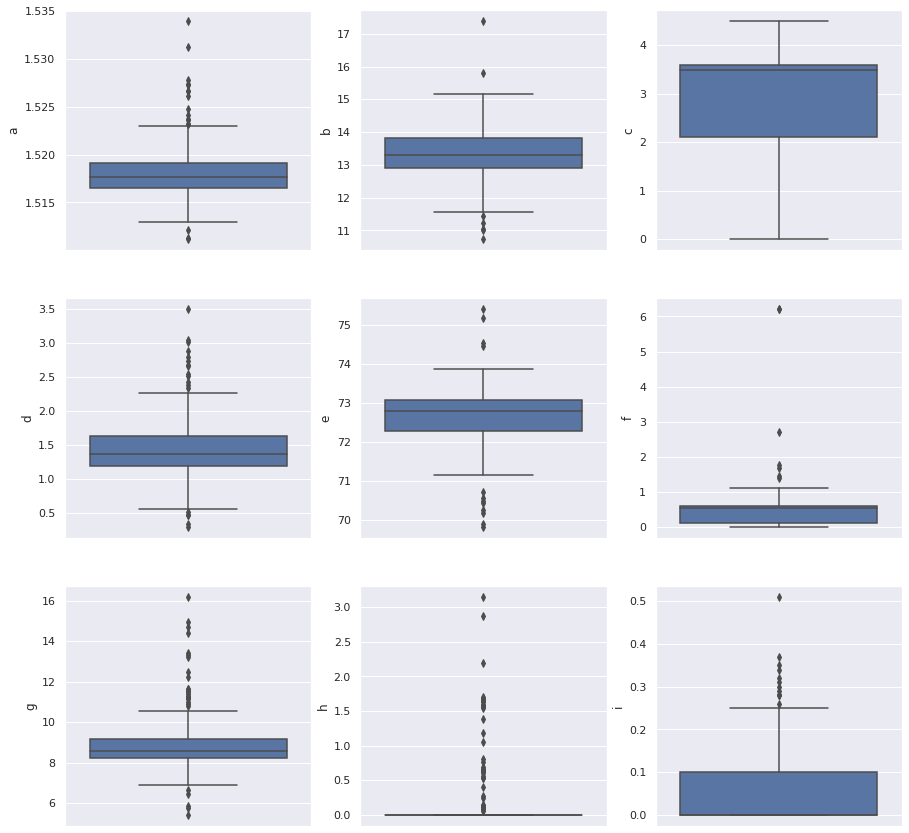

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
sns.boxplot(data=Q1_data,  y='a', ax=axes[0,0])
sns.boxplot(data=Q1_data,  y='b', ax=axes[0,1])
sns.boxplot(data=Q1_data,  y='c', ax=axes[0,2])
sns.boxplot(data=Q1_data,  y='d', ax=axes[1,0])
sns.boxplot(data=Q1_data,  y='e', ax=axes[1,1])
sns.boxplot(data=Q1_data,  y='f', ax=axes[1,2])
sns.boxplot(data=Q1_data,  y='g', ax=axes[2,0])
sns.boxplot(data=Q1_data,  y='h', ax=axes[2,1])
sns.boxplot(data=Q1_data,  y='i', ax=axes[2,2])

<span style=color:blue>**Summary**<br>
- Except feature C all the features of the data contains outlier 
- Reveiw the data for ensure no mistakes and for prcoeeed for further insights 



**Distribution studies**

<AxesSubplot:xlabel='h', ylabel='Count'>

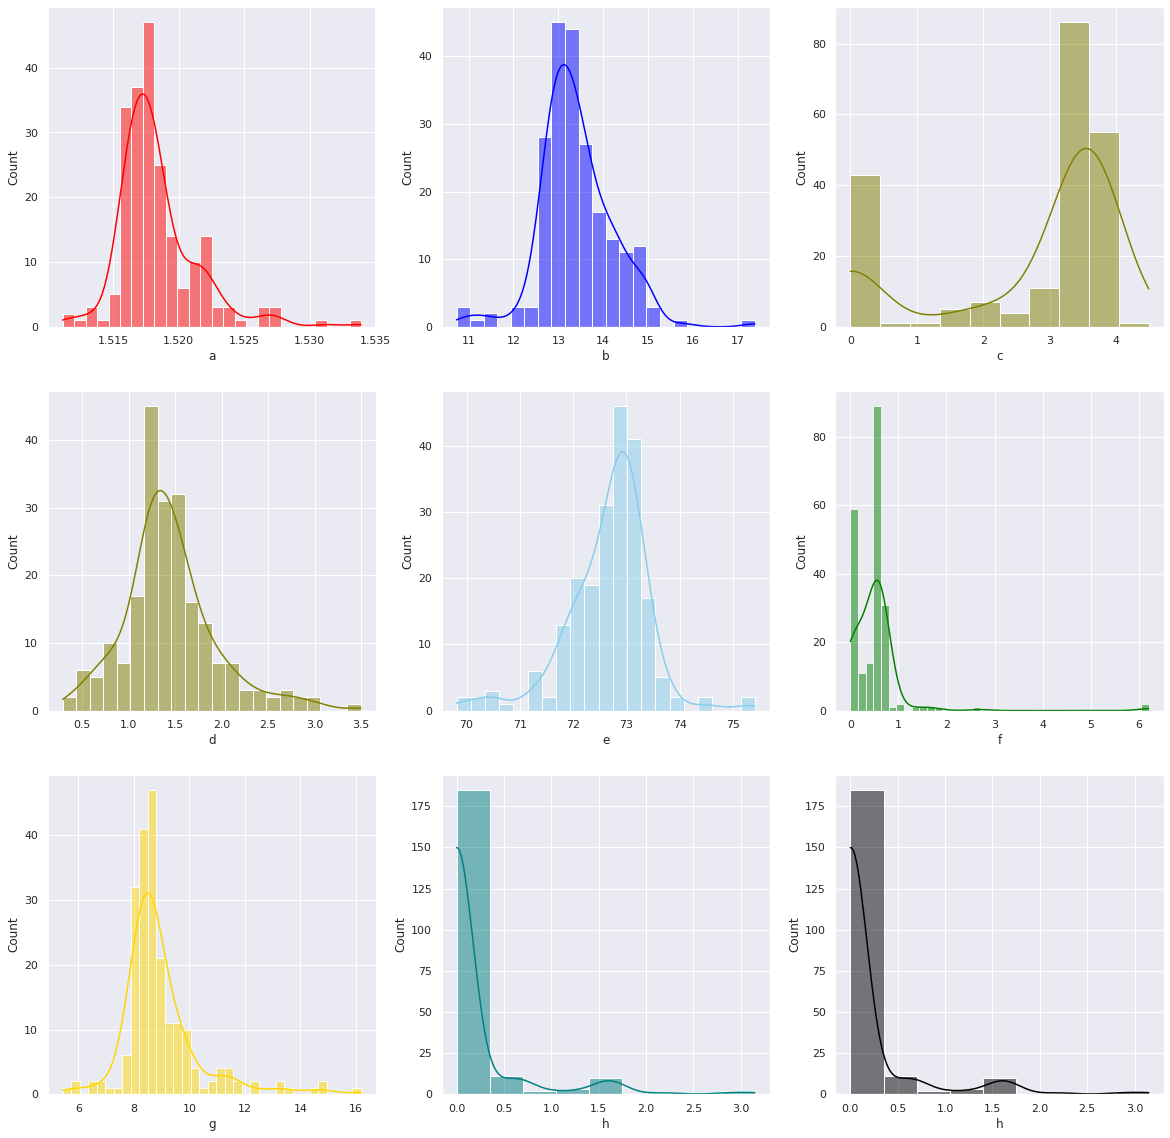

In [53]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

sns.histplot(data=Q1_data, x="a", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=Q1_data, x="b", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=Q1_data, x="c", kde=True, color="olive", ax=axs[0, 2])
sns.histplot(data=Q1_data, x="d", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=Q1_data, x="e", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=Q1_data, x="f", kde=True, color="green", ax=axs[1, 2])
sns.histplot(data=Q1_data, x="g", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=Q1_data, x="h", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=Q1_data, x="h", kde=True, color="black", ax=axs[2, 2])

<span style=color:blue>**Summary**<br>
- As per VEDA(Visual exploratory data analysis )Features a,b,d,e,g looks normally distributed and other features
has skewed



<span style=color:blue>**Paramtric/Non parametric tests**<br>
- There are different test like  **Shapiro-Wilk Test** ,**D'Agostino and Pearson's Test**  and   **Anderson Darling test** for  normality chekc.IF Data follow normal distibution then the particular feature 
is paratric else non parametric


In [54]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(Q1_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.516, p=0.000
Sample does not look Gaussian (reject H0)


In [55]:
from scipy.stats import shapiro
for i in Q1_data:
    print([i])
    a,b =shapiro(Q1_data[i])
    print("Statistics",a,"p-value",b)
    alpha=0.05
    if b < alpha:
        print("The null Hypothsis can be rejected and data not follow normal distibution")
    else:
        print("The null Hypothsis can not  be rejected and data follow normal distibution")  
    
    
    
    
    
    


['a']
Statistics 0.8675720691680908 p-value 1.0766432233591527e-12
The null Hypothsis can be rejected and data not follow normal distibution
['b']
Statistics 0.9457624554634094 p-value 3.4656832781365665e-07
The null Hypothsis can be rejected and data not follow normal distibution
['c']
Statistics 0.6993362307548523 p-value 2.3908993861355223e-19
The null Hypothsis can be rejected and data not follow normal distibution
['d']
Statistics 0.9434126615524292 p-value 2.083195624891232e-07
The null Hypothsis can be rejected and data not follow normal distibution
['e']
Statistics 0.9196613430976868 p-value 2.174813440447565e-09
The null Hypothsis can be rejected and data not follow normal distibution
['f']
Statistics 0.4416174292564392 p-value 2.1721748481042377e-25
The null Hypothsis can be rejected and data not follow normal distibution
['g']
Statistics 0.7938680648803711 p-value 4.2866537515527225e-16
The null Hypothsis can be rejected and data not follow normal distibution
['h']
Statistic

In [56]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
for i in Q1_data:
    print([i])
    a,b =normaltest(Q1_data[i])
    print("Statistics",a,"p-value",b)
    alpha=0.05
    if b < alpha:
        print("The null Hypothsis can be rejected and data not follow normal distibution")
    else:
        print("The null Hypothsis can not  be rejected and data follow normal distibution") 

['a']
Statistics 84.35847616242576 p-value 4.806065113857877e-19
The null Hypothsis can be rejected and data not follow normal distibution
['b']
Statistics 27.01512322700194 p-value 1.3606315193912945e-06
The null Hypothsis can be rejected and data not follow normal distibution
['c']
Statistics 35.884701888843615 p-value 1.6133774867893193e-08
The null Hypothsis can be rejected and data not follow normal distibution
['d']
Statistics 36.773485314427916 p-value 1.0345205542035924e-08
The null Hypothsis can be rejected and data not follow normal distibution
['e']
Statistics 35.872952858313454 p-value 1.6228831908287943e-08
The null Hypothsis can be rejected and data not follow normal distibution
['f']
Statistics 305.66553718924274 p-value 4.222522236925305e-67
The null Hypothsis can be rejected and data not follow normal distibution
['g']
Statistics 109.47261944094014 p-value 1.6916975823728216e-24
The null Hypothsis can be rejected and data not follow normal distibution
['h']
Statistics 

<span style=color:blue>**Summary**<br>
- As per the normality test above all features are non-parametric

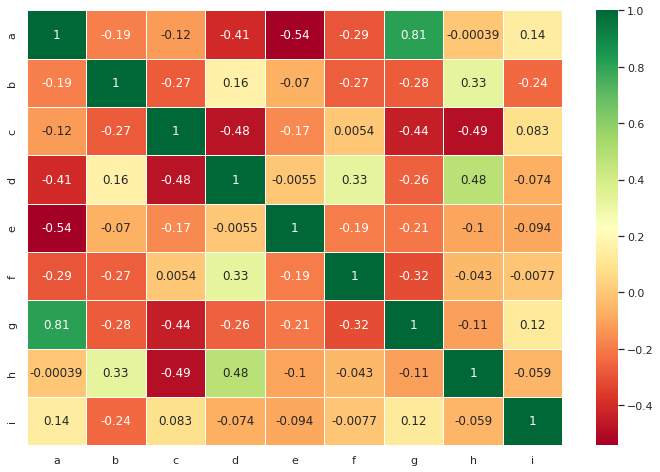

In [57]:
sns.heatmap(Q1_data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

<span style=color:blue>**Summary**<br>
- features a and g strongly positively co-related
- features a and e negatively co-related


 **Performing  some clustering with Kmeans clustering and hierarchical (dendogram) clustering**

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [59]:
M=Q1_data.copy()

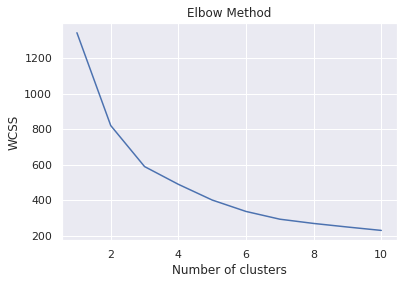

In [60]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(M)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<span style=color:blue>**Summary**<br>
- Elbow method suggests 3 clusters

In [61]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(M)

In [62]:
pred_y

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [63]:
len(pred_y)

214

In [64]:
Q1_data['predictions1'] = pd.DataFrame(pred_y)


In [65]:
Q1_data.head()

,a,b,c,d,e,f,g,h,i,predictions1
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1


In [66]:
Q1_data.predictions1.value_counts()

1    162
0     31
2     21
Name: predictions1, dtype: int64

**Lets scale the features using minmaxscaler and see if we can slighlty better results**

In [67]:
scaler = MinMaxScaler()
M_scaled = scaler.fit_transform(M)

In [68]:
M_scaled[:5]

array([[0.27216857, 0.3443609 , 0.78841871, 0.43613707, 0.52142857,
        0.08695652, 0.27973978, 0.        , 0.1372549 ],
       [0.88235294, 0.        , 0.        , 0.56386293, 0.        ,
        0.09339775, 0.73141264, 1.        , 0.54901961],
       [0.52019315, 0.38796992, 0.79732739, 0.16510903, 0.38928571,
        0.01932367, 0.44052045, 0.        , 0.05882353],
       [0.28665496, 0.27518797, 0.78396437, 0.35514019, 0.59642857,
        0.09178744, 0.28903346, 0.        , 0.        ],
       [0.30640913, 0.40601504, 0.88641425, 0.27725857, 0.47857143,
        0.09339775, 0.2527881 , 0.        , 0.        ]])

In [69]:
pred_y = kmeans.fit_predict(M_scaled)

In [75]:
pred_y

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [76]:
Q1_data['predictions2'] = pd.DataFrame(pred_y)

In [78]:
Q1_data.predictions2 = Q1_data.predictions2.astype(int)

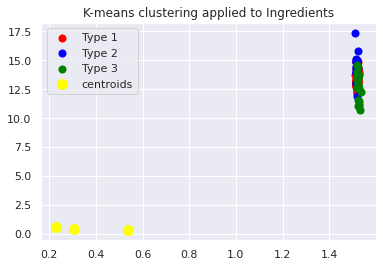

In [80]:
#Lets visualize the clusters and their centroids together

plt.figure(2)
plt.scatter(M.iloc[pred_y == 0, 0], M.iloc[pred_y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(M.iloc[pred_y == 1, 0], M.iloc[pred_y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(M.iloc[pred_y == 2, 0], M.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Type 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Ingredients")

plt.legend()
plt.show()


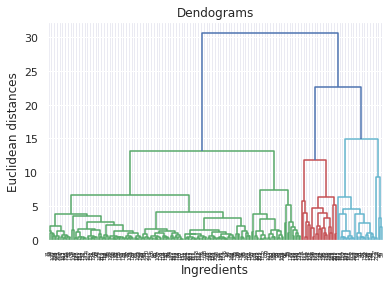

In [81]:
#Use dendrogram to find the optimal number of clusters


import scipy.cluster.hierarchy as sch
dendrogram_1 = sch.dendrogram(sch.linkage(M, method = 'ward'))
fig.set_size_inches(12,8)
plt.title('Dendograms')
plt.xlabel('Ingredients')
plt.ylabel('Euclidean distances')
plt.show()

<span style=color:blue>**Summary**<br>
- Data look have 3 clusters based on different algorthems